# Data cleaning

### Table of contents:
1. Identify and Remove Columns That Contain a Single Value ; using ---> nunique
3. Identify and Remove Columns That Have Very Few Values(low variance) ---> sklearn.feature_selection VarianceThreshold
5. Identify and Remove Rows that Contain Duplicate Data ---> duplicated


### Goals/objective :
* How to identify and remove column variables that only have a single value.
* How to identify and consider column variables with very few unique values.
* How to identify and remove rows that contain duplicate observations.

## 1. Identify and Remove Columns That Contain a Single Value

Columns that have a single observation or value are probably useless for modeling. These
columns or predictors are referred to zero-variance predictors as if we measured the variance
(average value from the mean), it would be zero.

In [5]:
#library
import pandas as pd 
#loading the data
df_oilspill = pd.read_csv('oil-spill.csv', header= None)
#summarize the no. of unquie values in each feature(predictors)
print(df_oilspill.nunique())
print(df_oilspill.shape)

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64
(937, 50)


In [6]:
#get the no. of unquie values 
counts = df_oilspill.nunique()
#records that has to be deleted
to_del =[i for i,v in enumerate(counts) if v ==1]
print(to_del)
#drop those col
df_oilspill = df_oilspill.drop(to_del, axis=1)
#after removal
print(df_oilspill.shape)

[22]
(937, 49)


## 2. Identify and Remove Columns That Have Very Few Values(Low variance)

There were columns that only had 2, 4, and 9 unique values. This might
make sense for ordinal or categorical variables. In this case, however, the dataset only contains
numerical variables.

To help highlight columns of this type,
you can calculate the number of unique values for each variable as a percentage of the total
number of rows in the dataset.

In [7]:
#summarize the percentage of unique values for each column
from numpy import loadtxt
from numpy import unique
#load the data
df = loadtxt('oil-spill.csv', delimiter=',')
#summarize
for i in range(df.shape[1]):
    n = len(unique(df[:, i]))
    percentage = (float(n) / df.shape[0] )* 100
    print("%d, %d, %0.1f%%" %(i, n, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [8]:
#modify the above code to get columns that have low variance (less than 1% )
#load the data
df = loadtxt('oil-spill.csv', delimiter=',')
#summarize
for i in range(df.shape[1]):
    n = len(unique(df[:, i]))
    percentage = (float(n) / df.shape[0] )* 100
    
    if percentage < 1:
        print("%d, %d, %0.1f%%" %(i, n, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


These columns have be to removed.

In [9]:
#deleting the low variance column.
df = pd.read_csv('oil-spill.csv', header=None)
print(df.shape)
#get unique values
counts = df.nunique()
#record to delete the low variance col
to_del =[i for i,v in enumerate(counts) if (float(v)/df.shape[0])*100 < 1]
print(to_del)
#drop those cols
df = df.drop(to_del, axis =1)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


11 Low variance columns have been removed from the dataset.

### 2.1 Another method to Remove columns that have low variance

(937, 49) (937,)
Threshold: 0.00	 Features: 48
Threshold: 0.05	 Features: 37
Threshold: 0.10	 Features: 36
Threshold: 0.15	 Features: 35
Threshold: 0.20	 Features: 35
Threshold: 0.25	 Features: 35
Threshold: 0.30	 Features: 35
Threshold: 0.35	 Features: 35
Threshold: 0.40	 Features: 35
Threshold: 0.45	 Features: 33
Threshold: 0.50	 Features: 31


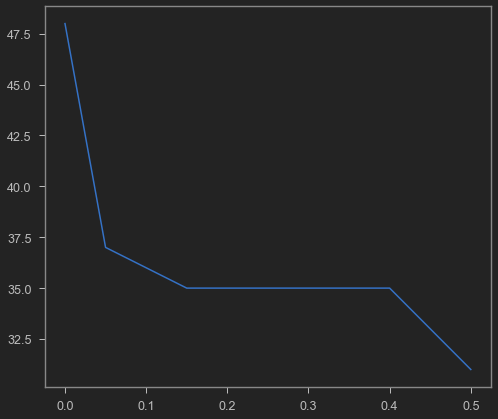

In [2]:
#libraries
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
#load the data
df = pd.read_csv('oil-spill.csv', header=None)
#split the data into inputs and outputs
data = df.values
X = data[:,:-1]
y = data[:,-1]
print(X.shape, y.shape)
#define the threshold to check
thresholds = np.arange(0.0,0.55,0.05)
#apply the tansform to each threshold
result = list()
for t in thresholds:
    #define the transform
    var_th = VarianceThreshold(threshold=t)
    #transform the i/p data
    X_sel = var_th.fit_transform(X)
    #determine the no. of i/p features 
    n_features = X_sel.shape[1]
    print("Threshold: %.2f\t Features: %d"%(t,n_features))
    #store those results
    result.append(n_features)
    
#plotting the threshold vs no. of selected features
plt.plot(thresholds, result)
plt.show()

## 3. Identify and Remove the row that contain Duplicate Data

Data deduplication, also known as duplicate detection, record linkage, record matching, or entity resolution, refers to the process of identifying tuples in one or more
relations that refer to the same real-world entity.

In [24]:
#load the data
df = pd.read_csv('iris.csv', header=None)
#calculate duplicates
dup = df.duplicated()
#report if there is any duplicate
print("Is there any duplicates in my dataset:",dup.any())
#list all duplicate rows
print("\n", df[dup])

Is there any duplicates in my dataset: True

        0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


In [25]:
#deleting duplicate rows
print(df.shape)
#delete those records
df = df.drop_duplicates()
print(df.shape)

(150, 5)
(147, 5)


## API

 numpy.unique API.
https://numpy.org/doc/stable/reference/generated/numpy.unique.html

 pandas.DataFrame.nunique API.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

 pandas.DataFrame.drop API.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

 pandas.DataFrame.duplicated API.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

 pandas.DataFrame.drop duplicates API.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
